## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  32.908858   343.131951  0.629765   5.897729  1.423050
1  58.085300   407.855374  0.466409   2.907644  1.236573
2  13.002219  1643.979541  0.045689  10.666193  1.528621
3  90.717241   202.882806  0.294341   2.878772  0.766951
4  69.415297  1568.750667  0.964966   7.816512  1.546245


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8728325	total: 55.8ms	remaining: 55.8s
1:	learn: 0.8631847	total: 56.3ms	remaining: 28.1s
2:	learn: 0.8554565	total: 56.7ms	remaining: 18.8s
3:	learn: 0.8464251	total: 57.1ms	remaining: 14.2s
4:	learn: 0.8395368	total: 57.5ms	remaining: 11.4s
5:	learn: 0.8326715	total: 57.9ms	remaining: 9.59s
6:	learn: 0.8252546	total: 58.3ms	remaining: 8.26s
7:	learn: 0.8153651	total: 58.6ms	remaining: 7.27s
8:	learn: 0.8071566	total: 59ms	remaining: 6.5s
9:	learn: 0.7983422	total: 59.3ms	remaining: 5.87s
10:	learn: 0.7918540	total: 59.7ms	remaining: 5.36s
11:	learn: 0.7839372	total: 60.1ms	remaining: 4.95s
12:	learn: 0.7769858	total: 60.5ms	remaining: 4.59s
13:	learn: 0.7692568	total: 60.8ms	remaining: 4.29s
14:	learn: 0.7608982	total: 61.2ms	remaining: 4.02s
15:	learn: 0.7552747	total: 61.5ms	remaining: 3.78s
16:	learn: 0.7488132	total: 62ms	remaining: 3.58s
17:	learn: 0.7415615	total: 62.3ms	remaining: 3.4s
18:	learn: 0.7354174	total: 62.6ms	remaining: 3.23

100:	learn: 0.3866752	total: 92.1ms	remaining: 820ms
101:	learn: 0.3843917	total: 92.7ms	remaining: 816ms
102:	learn: 0.3818796	total: 93ms	remaining: 810ms
103:	learn: 0.3794862	total: 93.4ms	remaining: 804ms
104:	learn: 0.3765644	total: 93.7ms	remaining: 799ms
105:	learn: 0.3737785	total: 94.1ms	remaining: 793ms
106:	learn: 0.3713068	total: 94.4ms	remaining: 788ms
107:	learn: 0.3691837	total: 94.7ms	remaining: 782ms
108:	learn: 0.3668250	total: 95.1ms	remaining: 777ms
109:	learn: 0.3645526	total: 95.5ms	remaining: 773ms
110:	learn: 0.3622856	total: 96ms	remaining: 769ms
111:	learn: 0.3604867	total: 96.6ms	remaining: 766ms
112:	learn: 0.3580363	total: 97.2ms	remaining: 763ms
113:	learn: 0.3557427	total: 97.6ms	remaining: 758ms
114:	learn: 0.3536614	total: 97.9ms	remaining: 753ms
115:	learn: 0.3509762	total: 98.2ms	remaining: 748ms
116:	learn: 0.3488318	total: 98.4ms	remaining: 743ms
117:	learn: 0.3466222	total: 98.8ms	remaining: 738ms
118:	learn: 0.3444074	total: 99.1ms	remaining: 733

336:	learn: 0.1275385	total: 183ms	remaining: 361ms
337:	learn: 0.1269749	total: 184ms	remaining: 360ms
338:	learn: 0.1263880	total: 184ms	remaining: 360ms
339:	learn: 0.1259560	total: 185ms	remaining: 359ms
340:	learn: 0.1253811	total: 185ms	remaining: 358ms
341:	learn: 0.1248308	total: 186ms	remaining: 357ms
342:	learn: 0.1243579	total: 186ms	remaining: 356ms
343:	learn: 0.1239419	total: 186ms	remaining: 355ms
344:	learn: 0.1233853	total: 187ms	remaining: 354ms
345:	learn: 0.1229143	total: 187ms	remaining: 354ms
346:	learn: 0.1222100	total: 188ms	remaining: 353ms
347:	learn: 0.1218072	total: 188ms	remaining: 352ms
348:	learn: 0.1214964	total: 188ms	remaining: 351ms
349:	learn: 0.1208028	total: 189ms	remaining: 351ms
350:	learn: 0.1202662	total: 189ms	remaining: 350ms
351:	learn: 0.1196000	total: 190ms	remaining: 349ms
352:	learn: 0.1192487	total: 190ms	remaining: 349ms
353:	learn: 0.1188497	total: 191ms	remaining: 348ms
354:	learn: 0.1181945	total: 191ms	remaining: 347ms
355:	learn: 

544:	learn: 0.0595194	total: 272ms	remaining: 227ms
545:	learn: 0.0592874	total: 273ms	remaining: 227ms
546:	learn: 0.0590804	total: 273ms	remaining: 226ms
547:	learn: 0.0589222	total: 273ms	remaining: 226ms
548:	learn: 0.0587678	total: 274ms	remaining: 225ms
549:	learn: 0.0586242	total: 274ms	remaining: 225ms
550:	learn: 0.0584230	total: 275ms	remaining: 224ms
551:	learn: 0.0583218	total: 275ms	remaining: 223ms
552:	learn: 0.0581391	total: 276ms	remaining: 223ms
553:	learn: 0.0580150	total: 276ms	remaining: 223ms
554:	learn: 0.0578350	total: 277ms	remaining: 222ms
555:	learn: 0.0576579	total: 277ms	remaining: 221ms
556:	learn: 0.0575357	total: 278ms	remaining: 221ms
557:	learn: 0.0573614	total: 278ms	remaining: 220ms
558:	learn: 0.0572412	total: 279ms	remaining: 220ms
559:	learn: 0.0570695	total: 279ms	remaining: 219ms
560:	learn: 0.0568302	total: 279ms	remaining: 219ms
561:	learn: 0.0566078	total: 280ms	remaining: 218ms
562:	learn: 0.0563927	total: 280ms	remaining: 218ms
563:	learn: 

751:	learn: 0.0333738	total: 366ms	remaining: 121ms
752:	learn: 0.0332964	total: 367ms	remaining: 120ms
753:	learn: 0.0332022	total: 367ms	remaining: 120ms
754:	learn: 0.0331122	total: 368ms	remaining: 119ms
755:	learn: 0.0330192	total: 368ms	remaining: 119ms
756:	learn: 0.0329877	total: 369ms	remaining: 118ms
757:	learn: 0.0329567	total: 369ms	remaining: 118ms
758:	learn: 0.0328826	total: 370ms	remaining: 117ms
759:	learn: 0.0327900	total: 370ms	remaining: 117ms
760:	learn: 0.0326692	total: 371ms	remaining: 116ms
761:	learn: 0.0325791	total: 371ms	remaining: 116ms
762:	learn: 0.0324882	total: 372ms	remaining: 115ms
763:	learn: 0.0323702	total: 372ms	remaining: 115ms
764:	learn: 0.0322814	total: 373ms	remaining: 115ms
765:	learn: 0.0321928	total: 373ms	remaining: 114ms
766:	learn: 0.0321193	total: 374ms	remaining: 113ms
767:	learn: 0.0320220	total: 374ms	remaining: 113ms
768:	learn: 0.0319379	total: 374ms	remaining: 112ms
769:	learn: 0.0318653	total: 375ms	remaining: 112ms
770:	learn: 

950:	learn: 0.0203507	total: 454ms	remaining: 23.4ms
951:	learn: 0.0202672	total: 454ms	remaining: 22.9ms
952:	learn: 0.0202078	total: 455ms	remaining: 22.4ms
953:	learn: 0.0201902	total: 455ms	remaining: 22ms
954:	learn: 0.0201626	total: 456ms	remaining: 21.5ms
955:	learn: 0.0201452	total: 456ms	remaining: 21ms
956:	learn: 0.0200712	total: 457ms	remaining: 20.5ms
957:	learn: 0.0200492	total: 457ms	remaining: 20ms
958:	learn: 0.0200075	total: 458ms	remaining: 19.6ms
959:	learn: 0.0199640	total: 458ms	remaining: 19.1ms
960:	learn: 0.0199467	total: 459ms	remaining: 18.6ms
961:	learn: 0.0199296	total: 459ms	remaining: 18.1ms
962:	learn: 0.0198788	total: 460ms	remaining: 17.7ms
963:	learn: 0.0198010	total: 460ms	remaining: 17.2ms
964:	learn: 0.0197295	total: 460ms	remaining: 16.7ms
965:	learn: 0.0196888	total: 461ms	remaining: 16.2ms
966:	learn: 0.0196470	total: 461ms	remaining: 15.7ms
967:	learn: 0.0196302	total: 462ms	remaining: 15.3ms
968:	learn: 0.0195892	total: 462ms	remaining: 14.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

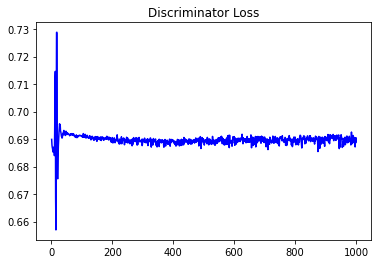

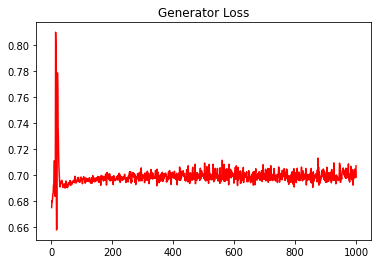

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2531129305833641


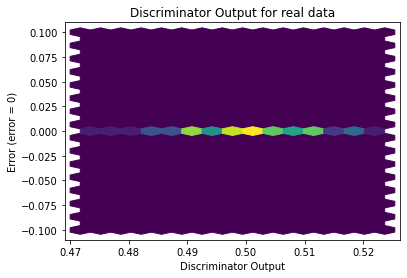

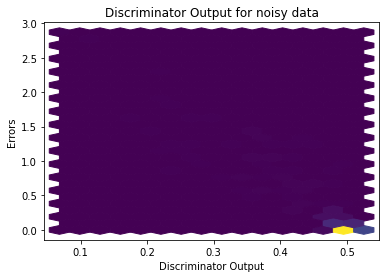

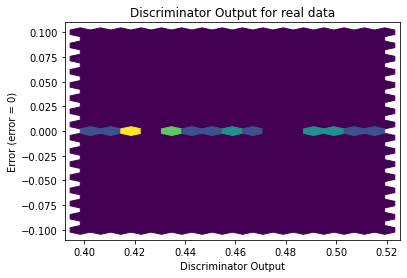

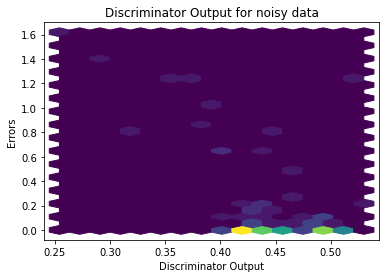

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


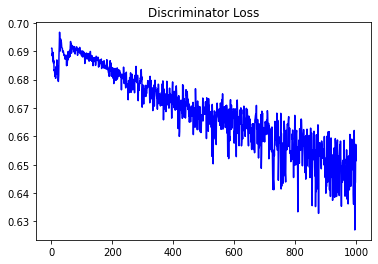

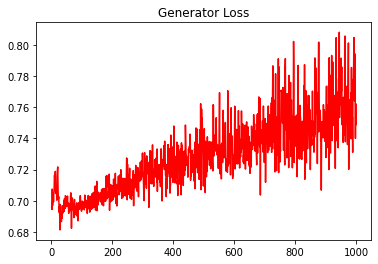

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3677160245066773


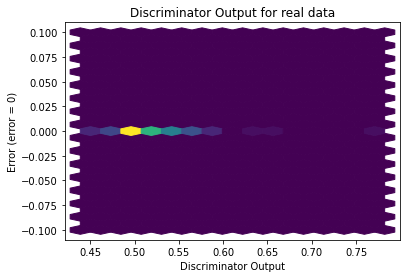

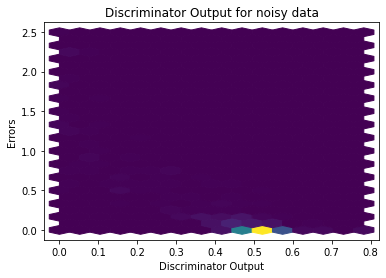

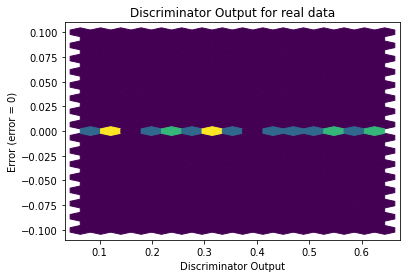

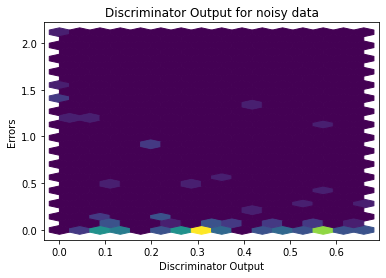

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1854]], requires_grad=True)
